In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 68ms/step - loss: 0.5213 - accuracy: 0.7765 - val_loss: 0.3915 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3195 - accuracy: 0.8955 - val_loss: 0.3560 - val_accuracy: 0.8547
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2386 - accuracy: 0.9226 - val_loss: 0.2839 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1928 - accuracy: 0.9351 - val_loss: 0.2900 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1611 - accuracy: 0.9473 - val_loss: 0.3007 - val_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1328 - accuracy: 0.9583 - val_loss: 0.3017 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1171 - accuracy: 0.9639 - val_loss: 0.3108 - val_accuracy: 0.8788
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

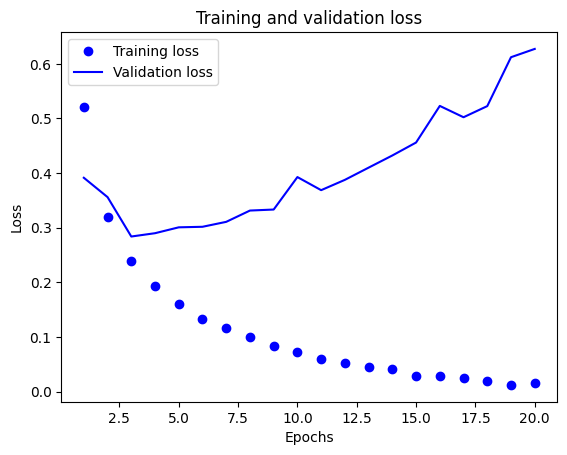

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

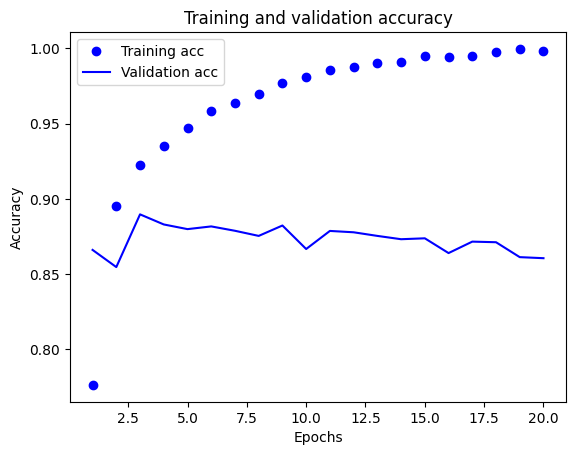

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 7s 33ms/step - loss: 0.5148 - accuracy: 0.7978
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.3099 - accuracy: 0.8937
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2377 - accuracy: 0.9145
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2784 - accuracy: 0.8891


In [ ]:
results

[0.27842622995376587, 0.8891199827194214]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.27425697],
       [0.9989247 ],
       [0.90748364],
       ...,
       [0.0914925 ],
       [0.07871728],
       [0.6139318 ]], dtype=float32)

In [ ]:
#we used 1 hidden layer 16 nodes

Epoch 1/20
30/30 [==============================] - 7s 68ms/step - loss: 0.1723 - binary_accuracy: 0.7760 - val_loss: 0.1225 - val_binary_accuracy: 0.8612
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0926 - binary_accuracy: 0.9043 - val_loss: 0.0979 - val_binary_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0691 - binary_accuracy: 0.9319 - val_loss: 0.0898 - val_binary_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0552 - binary_accuracy: 0.9480 - val_loss: 0.0863 - val_binary_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0458 - binary_accuracy: 0.9600 - val_loss: 0.0855 - val_binary_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0387 - binary_accuracy: 0.9686 - val_loss: 0.0850 - val_binary_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - los

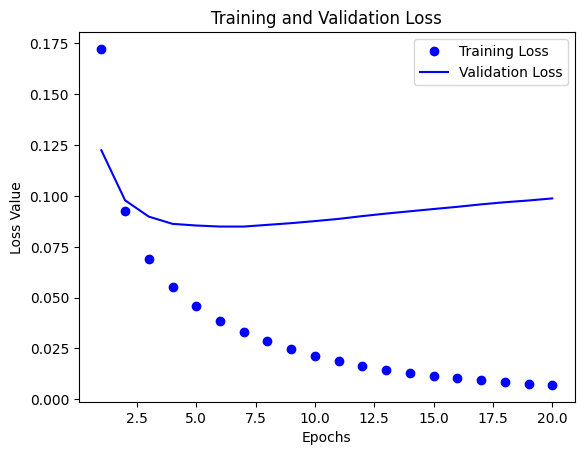

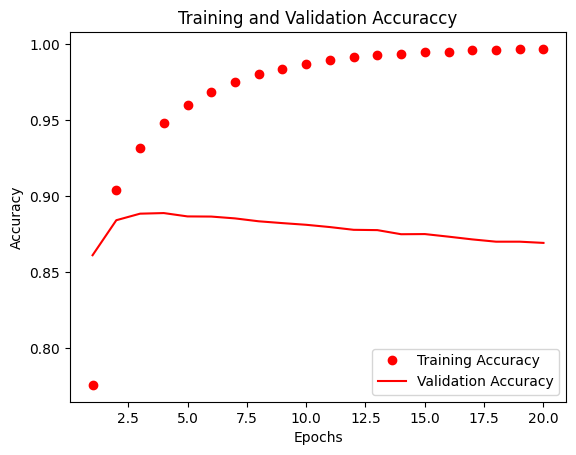

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.1523 - accuracy: 0.8216
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0842 - accuracy: 0.9066
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.0647 - accuracy: 0.9294
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.0865 - accuracy: 0.8858


[0.08645174652338028, 0.8858399987220764]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [ ]:
#We used 1 hidden layer 32 nodes

Epoch 1/20
30/30 [==============================] - 8s 78ms/step - loss: 0.1549 - binary_accuracy: 0.8019 - val_loss: 0.1091 - val_binary_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0783 - binary_accuracy: 0.9114 - val_loss: 0.0900 - val_binary_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0569 - binary_accuracy: 0.9416 - val_loss: 0.0854 - val_binary_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0442 - binary_accuracy: 0.9587 - val_loss: 0.0844 - val_binary_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0357 - binary_accuracy: 0.9699 - val_loss: 0.0850 - val_binary_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0292 - binary_accuracy: 0.9775 - val_loss: 0.0859 - val_binary_accuracy: 0.8813
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - los

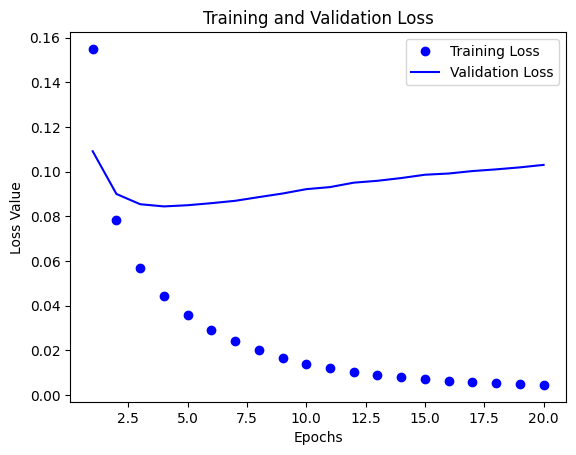

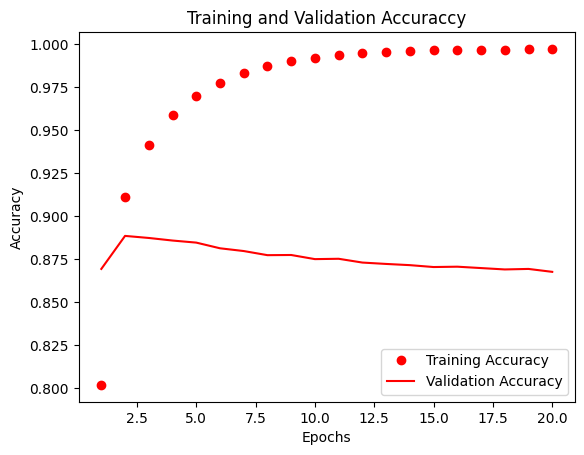

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1260 - accuracy: 0.8423
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0664 - accuracy: 0.9222
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0508 - accuracy: 0.9435
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.0889 - accuracy: 0.8795


[0.08893857151269913, 0.8795199990272522]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results


In [ ]:
#we take 1 hiddenlayer 64 nodes

Epoch 1/20
30/30 [==============================] - 7s 72ms/step - loss: 0.1532 - binary_accuracy: 0.7969 - val_loss: 0.1010 - val_binary_accuracy: 0.8793
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0701 - binary_accuracy: 0.9229 - val_loss: 0.0850 - val_binary_accuracy: 0.8917
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0489 - binary_accuracy: 0.9511 - val_loss: 0.0828 - val_binary_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0369 - binary_accuracy: 0.9669 - val_loss: 0.0840 - val_binary_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0280 - binary_accuracy: 0.9777 - val_loss: 0.0860 - val_binary_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0221 - binary_accuracy: 0.9846 - val_loss: 0.0880 - val_binary_accuracy: 0.8792
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - los

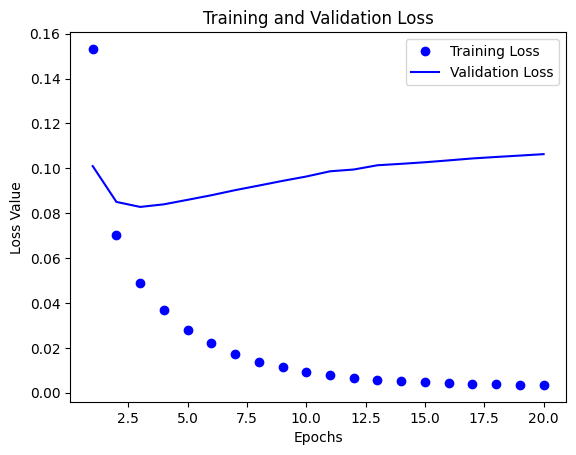

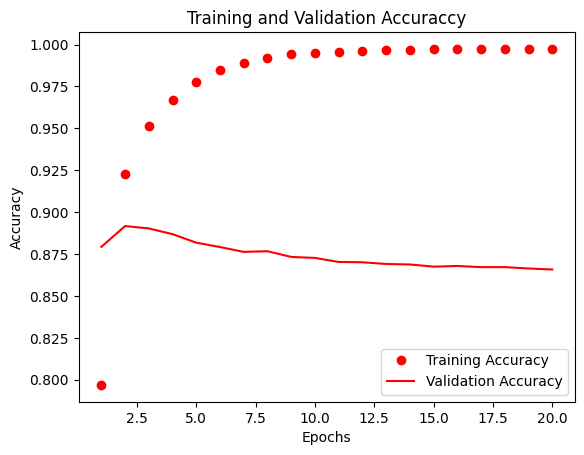

Epoch 1/4
49/49 [==============================] - 2s 19ms/step - loss: 0.1202 - accuracy: 0.8481
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.0613 - accuracy: 0.9268
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.0457 - accuracy: 0.9484
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.0938 - accuracy: 0.8730


[0.09382835775613785, 0.8730400204658508]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [ ]:
#We consider hidden layer 2 and nodes 16

Epoch 1/20
30/30 [==============================] - 8s 66ms/step - loss: 0.1821 - binary_accuracy: 0.7889 - val_loss: 0.1298 - val_binary_accuracy: 0.8583
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0936 - binary_accuracy: 0.9017 - val_loss: 0.0926 - val_binary_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0599 - binary_accuracy: 0.9371 - val_loss: 0.0842 - val_binary_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0423 - binary_accuracy: 0.9581 - val_loss: 0.0832 - val_binary_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0314 - binary_accuracy: 0.9716 - val_loss: 0.0851 - val_binary_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0236 - binary_accuracy: 0.9810 - val_loss: 0.0870 - val_binary_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - los

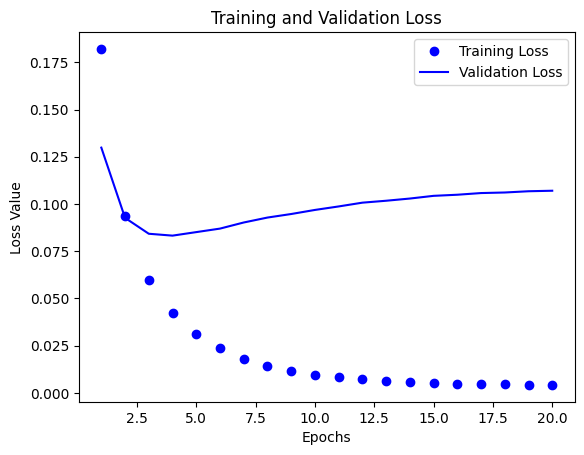

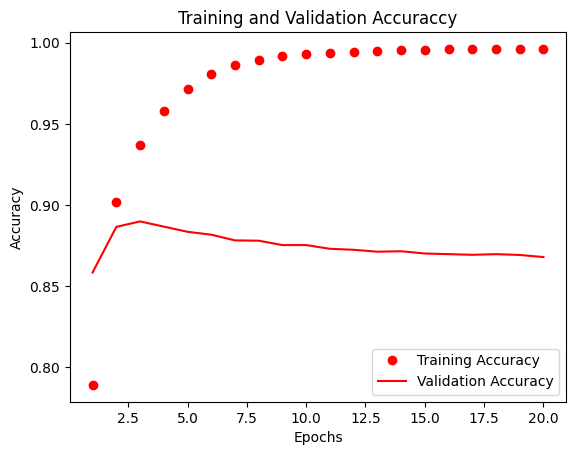

Epoch 1/4
49/49 [==============================] - 3s 20ms/step - loss: 0.1443 - accuracy: 0.8192
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.0669 - accuracy: 0.9183
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.0476 - accuracy: 0.9452
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.0928 - accuracy: 0.8750


[0.09282186627388, 0.8749600052833557]

In [ ]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/20
30/30 [==============================] - 4s 65ms/step - loss: 0.1532 - binary_accuracy: 0.8059 - val_loss: 0.0970 - val_binary_accuracy: 0.8747
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0648 - binary_accuracy: 0.9202 - val_loss: 0.0876 - val_binary_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0412 - binary_accuracy: 0.9515 - val_loss: 0.0840 - val_binary_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0271 - binary_accuracy: 0.9729 - val_loss: 0.0887 - val_binary_accuracy: 0.8798
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0181 - binary_accuracy: 0.9837 - val_loss: 0.0933 - val_binary_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0129 - binary_accuracy: 0.9896 - val_loss: 0.0979 - val_binary_accuracy: 0.8759
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - los

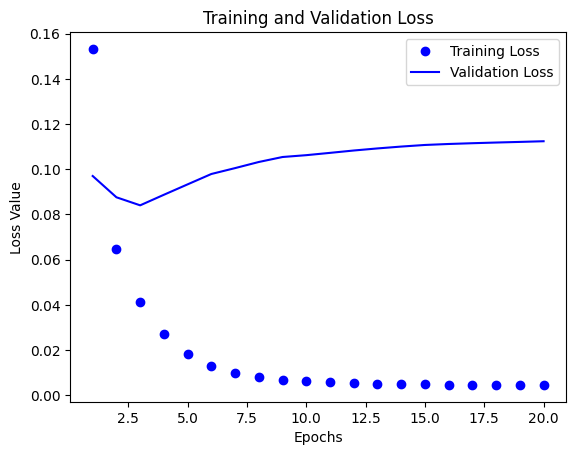

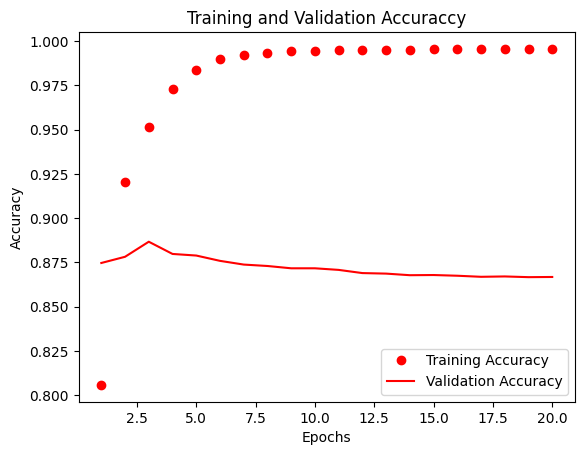

Epoch 1/2
49/49 [==============================] - 2s 14ms/step - loss: 0.1233 - accuracy: 0.8360
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0878 - accuracy: 0.8814


[0.08784940093755722, 0.8814399838447571]

In [ ]:
#We consider hidden layer 2 32 nodes
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                     batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [ ]:
#We consider hidden layer 2 64 nodes
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 4s 64ms/step - loss: 0.1400 - binary_accuracy: 0.8047 - val_loss: 0.0857 - val_binary_accuracy: 0.8840
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0532 - binary_accuracy: 0.9321 - val_loss: 0.0868 - val_binary_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0321 - binary_accuracy: 0.9638 - val_loss: 0.0898 - val_binary_accuracy: 0.8810
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0206 - binary_accuracy: 0.9799 - val_loss: 0.0964 - val_binary_accuracy: 0.8759
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0141 - binary_accuracy: 0.9869 - val_loss: 0.1029 - val_binary_accuracy: 0.8700
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0108 - binary_accuracy: 0.9905 - val_loss: 0.1056 - val_binary_accuracy: 0.8708
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

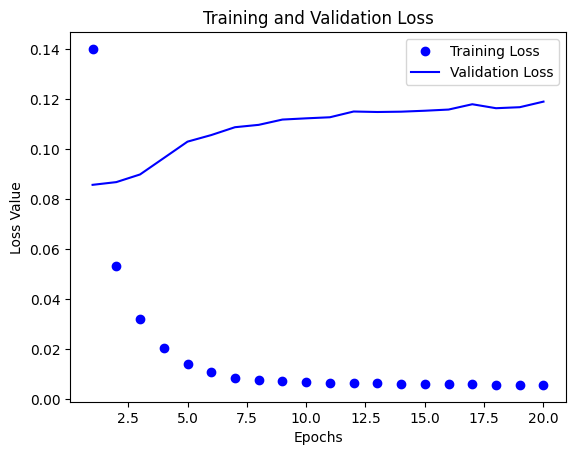

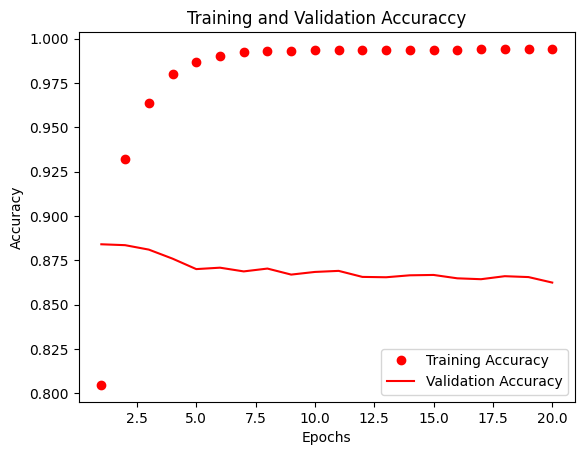

Epoch 1/2
49/49 [==============================] - 2s 15ms/step - loss: 0.1144 - accuracy: 0.8438
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0911 - accuracy: 0.8786


[0.09111196547746658, 0.878600001335144]

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [ ]:
#we consider hidden layer 3 nodes 16
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 8s 68ms/step - loss: 0.1587 - binary_accuracy: 0.7973 - val_loss: 0.0989 - val_binary_accuracy: 0.8714
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0657 - binary_accuracy: 0.9183 - val_loss: 0.0817 - val_binary_accuracy: 0.8918
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0401 - binary_accuracy: 0.9552 - val_loss: 0.0848 - val_binary_accuracy: 0.8850
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0261 - binary_accuracy: 0.9743 - val_loss: 0.0890 - val_binary_accuracy: 0.8816
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0187 - binary_accuracy: 0.9830 - val_loss: 0.0943 - val_binary_accuracy: 0.8786
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0135 - binary_accuracy: 0.9879 - val_loss: 0.0985 - val_binary_accuracy: 0.8775
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

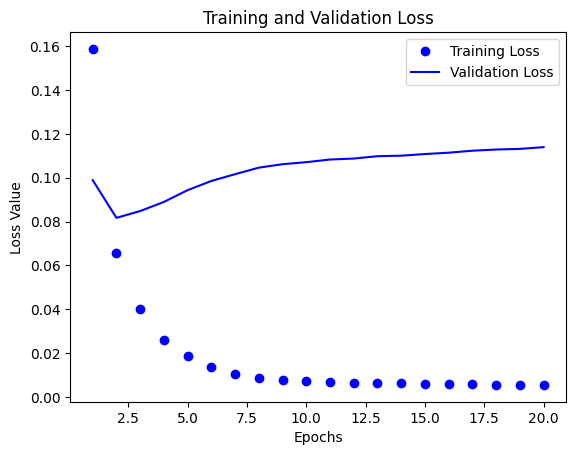

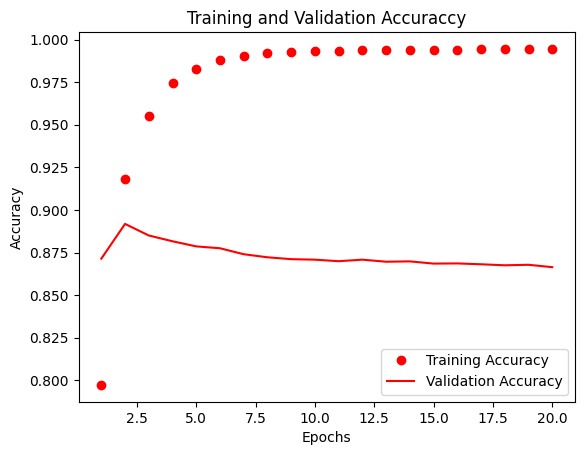

Epoch 1/3
49/49 [==============================] - 3s 15ms/step - loss: 0.1396 - accuracy: 0.8279
Epoch 2/3
49/49 [==============================] - 1s 15ms/step - loss: 0.0614 - accuracy: 0.9235
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.0913 - accuracy: 0.8774


[0.09133495390415192, 0.8773599863052368]

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results


In [ ]:
#Hidden layer 3 nodes 32
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 9s 94ms/step - loss: 0.1483 - binary_accuracy: 0.8068 - val_loss: 0.0897 - val_binary_accuracy: 0.8783
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0578 - binary_accuracy: 0.9258 - val_loss: 0.0845 - val_binary_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0334 - binary_accuracy: 0.9617 - val_loss: 0.0910 - val_binary_accuracy: 0.8779
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0214 - binary_accuracy: 0.9776 - val_loss: 0.0989 - val_binary_accuracy: 0.8733
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0151 - binary_accuracy: 0.9859 - val_loss: 0.1021 - val_binary_accuracy: 0.8751
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0115 - binary_accuracy: 0.9891 - val_loss: 0.1055 - val_binary_accuracy: 0.8734
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

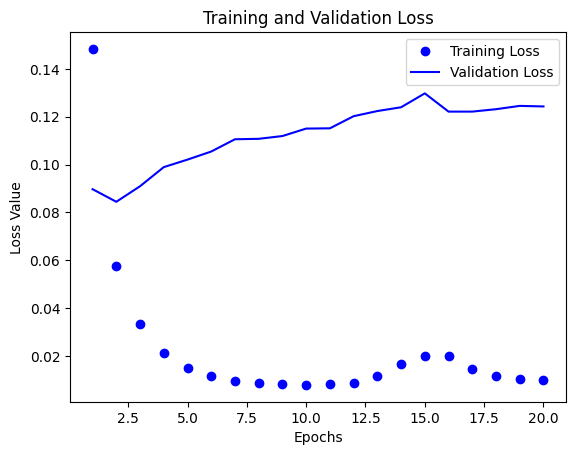

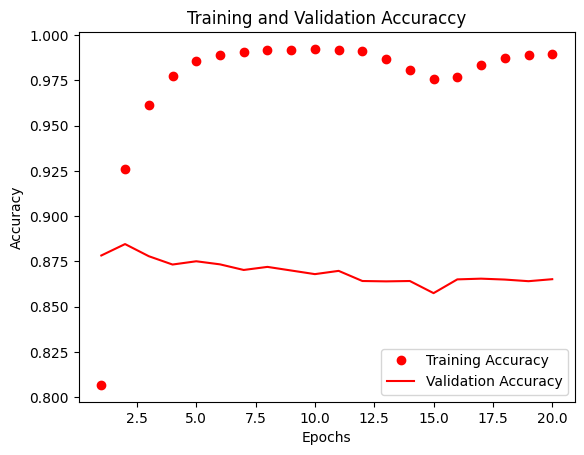

Epoch 1/6
49/49 [==============================] - 3s 21ms/step - loss: 0.1172 - accuracy: 0.8416
Epoch 2/6
49/49 [==============================] - 1s 18ms/step - loss: 0.0532 - accuracy: 0.9315
Epoch 3/6
49/49 [==============================] - 1s 22ms/step - loss: 0.0381 - accuracy: 0.9540
Epoch 4/6
49/49 [==============================] - 1s 26ms/step - loss: 0.0289 - accuracy: 0.9675
Epoch 5/6
49/49 [==============================] - 1s 28ms/step - loss: 0.0255 - accuracy: 0.9715
Epoch 6/6
782/782 [==============================] - 4s 4ms/step - loss: 0.1190 - accuracy: 0.8622


[0.11898766458034515, 0.8622000217437744]

In [ ]:

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [ ]:
#We consider layer 3 64 nodes
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 4s 64ms/step - loss: 0.1293 - binary_accuracy: 0.8243 - val_loss: 0.0889 - val_binary_accuracy: 0.8783
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0508 - binary_accuracy: 0.9359 - val_loss: 0.0897 - val_binary_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0307 - binary_accuracy: 0.9653 - val_loss: 0.0978 - val_binary_accuracy: 0.8754
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0218 - binary_accuracy: 0.9765 - val_loss: 0.1033 - val_binary_accuracy: 0.8713
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0179 - binary_accuracy: 0.9807 - val_loss: 0.1117 - val_binary_accuracy: 0.8678
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0173 - binary_accuracy: 0.9815 - val_loss: 0.1132 - val_binary_accuracy: 0.8681
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Epoch 1/20
30/30 [==============================] - 8s 68ms/step - loss: 0.1294 - binary_accuracy: 0.8207 - val_loss: 0.0846 - val_binary_accuracy: 0.8865
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0494 - binary_accuracy: 0.9381 - val_loss: 0.0976 - val_binary_accuracy: 0.8705
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0316 - binary_accuracy: 0.9637 - val_loss: 0.0988 - val_binary_accuracy: 0.8726
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0220 - binary_accuracy: 0.9761 - val_loss: 0.1052 - val_binary_accuracy: 0.8697
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0179 - binary_accuracy: 0.9810 - val_loss: 0.1126 - val_binary_accuracy: 0.8668
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0155 - binary_accuracy: 0.9841 - val_loss: 0.1139 - val_binary_accuracy: 0.8676
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - los

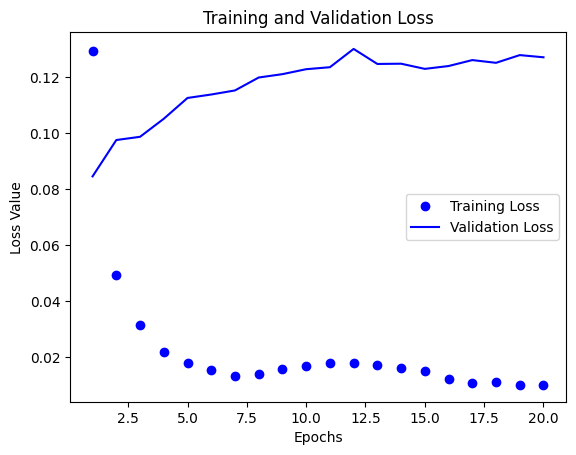

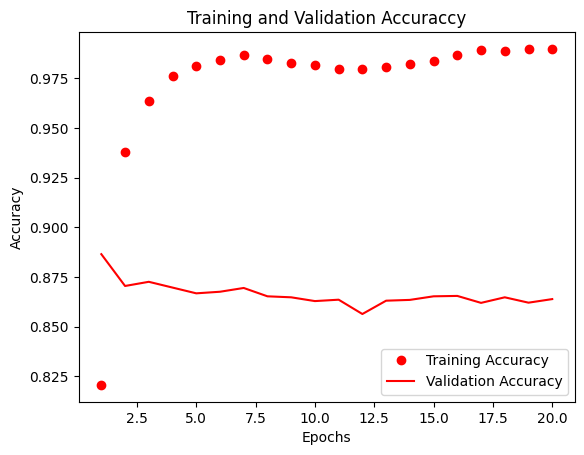

Epoch 1/2
49/49 [==============================] - 3s 16ms/step - loss: 0.1111 - accuracy: 0.8475
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0935 - accuracy: 0.8756


[0.09354441612958908, 0.8755999803543091]

In [ ]:
#We consider layer 3 64 nodes
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results